# Correlation

## Remarks
- **Pearson's Correlation**: measures linear relationship **[-1,1]** (+info [here](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient))
- **Spearman Correlation**: detects monotonic* relationships **[-1,1]** (+info [here](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)).
- **Mutual Information (MI)**: captures any sort of dependency - linear or non-linear [***no fixed range***].
- **Distance Correlation (dCor)**: (strong) indicator of both linear and non-linear dependencies **[0,1]**.

(*) a monotonic relationship - given two variables, the direction of the relationship remais consitent but not necessarily linear.

## Implementation

In [256]:
import numpy as np
import pandas as pd

#. Set seed
np.random.seed(42)

#. Fixed temperature
temperature = [5, 6, 8, 10, 12, 15, 19, 21, 25, 30]

#. Generate temperature and engine speed
num_points = 500
temperature_extended = np.random.choice(
    temperature, size=num_points) + np.random.uniform(-2, 2, size=num_points)
engine_speed = 1000 + 50 * np.sin(
    0.1 * np.arange(num_points)) + np.random.normal(0, 20, num_points)

#. Generate timestamps
timestamps = pd.date_range(
    start="2025-01-01 00:00:00", periods=num_points, freq="h")

#. Create dataframe
data = pd.DataFrame({
    "time": timestamps, 
    "temperature": temperature_extended, 
    "engine_speed_h1": engine_speed
})
data.set_index("time", inplace=True)

# Add stronger linear relationship: temperature and engine speed
high_corr_engine_speed = (1000 + 30 * temperature_extended + 
                          np.random.normal(0, 10, num_points))

#. Add a non-linear relationship: temperature and engine speed
engine_speed_nonlinear = (1000 + 10 * (temperature_extended**5.5) + 
                          np.random.normal(0, 15, num_points))

# Update the DataFrame
data["engine_speed_h2"] = high_corr_engine_speed
data["engine_speed_h3"] = engine_speed_nonlinear

display( data.head() )

,temperature,engine_speed_h1,engine_speed_h2,engine_speed_h3
time,,,,
2025-01-01 00:00:00,17.412495,1006.522660,1522.178486,6.679470e+07
2025-01-01 01:00:00,11.610212,979.969399,1353.831248,7.189200e+06
2025-01-01 02:00:00,21.021009,1028.414007,1632.869426,1.881902e+08
2025-01-01 03:00:00,13.305830,1011.077968,1412.816300,1.521456e+07
2025-01-01 04:00:00,18.280198,1009.016457,1549.658197,8.727703e+07


### Visualize the data

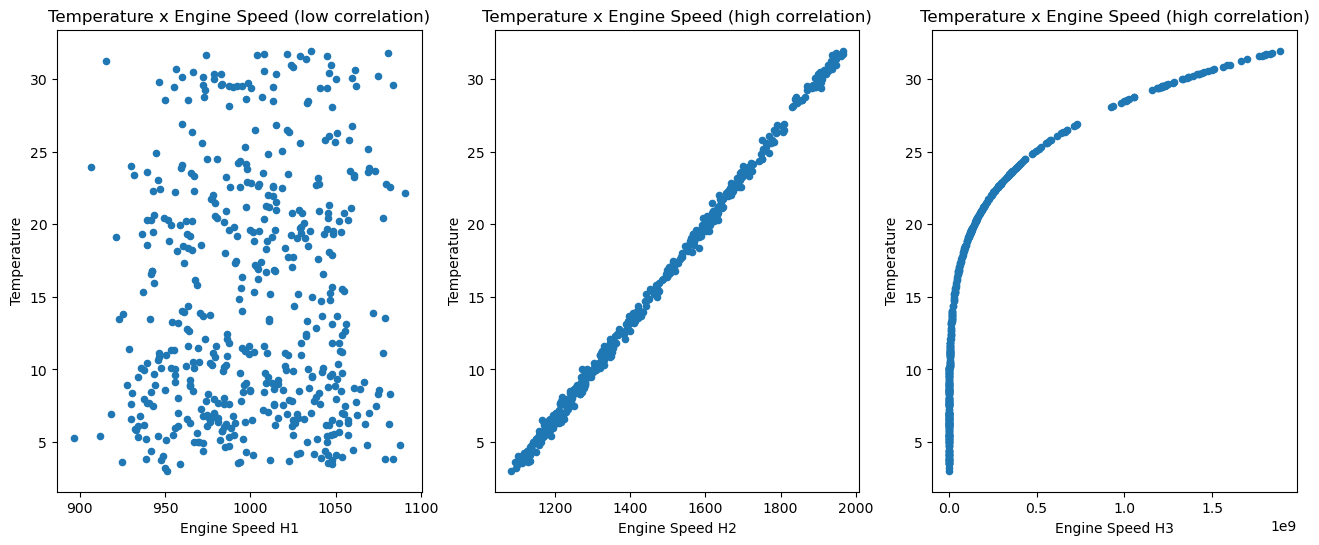

In [254]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

data.plot.scatter(x="engine_speed_h1", y="temperature", ax=axes[0])
axes[0].set(title="Temperature x Engine Speed (low correlation)", 
            xlabel="Engine Speed H1", ylabel="Temperature");

data.plot.scatter(x="engine_speed_h2", y="temperature", ax=axes[1])
axes[1].set(title="Temperature x Engine Speed (high correlation)", 
            xlabel="Engine Speed H2", ylabel="Temperature");

data.plot.scatter(x="engine_speed_h3", y="temperature", ax=axes[2])
axes[2].set(title="Temperature x Engine Speed (high correlation)", 
            xlabel="Engine Speed H3", ylabel="Temperature");

### Compute Linear Correlation

In [225]:
#. Temperature x Engine Speed H1 -----
pearson_corr_h1 = data["temperature"].corr(
    data["engine_speed_h1"], method="pearson")
print(f"- Pearson corr (Temp. x Eng. Speed H1): { round(pearson_corr_h1, 3) }")
#-------------------------------------

#. Temperature x Engine Speed H2 -----
pearson_corr_h2 = data["temperature"].corr(
    data["engine_speed_h2"], method="pearson")
print(f"- Pearson corr (Temp. x Eng. Speed H2): { round(pearson_corr_h2, 3) }")
#-------------------------------------

#. Temperature x Engine Speed H3 -----
pearson_corr_h3 = data["temperature"].corr(
    data["engine_speed_h3"], method="pearson")
print(f"- Pearson corr (Temp. x Eng. Speed H3): { round(pearson_corr_h3, 3) }")
#-------------------------------------

- Pearson corr (Temp. x Eng. Speed H1): 0.06
- Pearson corr (Temp. x Eng. Speed H2): 0.999
- Pearson corr (Temp. x Eng. Speed H3): 0.807


**Remarks**
- The Pearson correlation shows that **temperature** and **engine speed h1** do not have a linear correlation. That confirms what we saw in the previous picture (i.e. left picture).
- The correlation between **temperature** and **engine speed h2** (i.e. middle figure) is pretty high. That shows a strong linear relationship.
- **Temperature** and **engine speed h3** (i.e. right figure) clearly depicts a non-linear relationship, but it is still got a high Pearson correlation. This occurs when the nonlinearity closely resembles a **monotonic** trend. In this case, as temperature increases, engine spree also generally increases. Another fact here is that the nonlinearity is smooth and the noise is relatively small.

### Compute Non-Linear Correlation

In [227]:
from sklearn.feature_selection import mutual_info_regression
from dcor import distance_correlation

#. Spearman correlation -----
spearman_corr = data["temperature"].corr(
    data["engine_speed_h2"], method="spearman")
print(f"- Spearman Corr. (Temp x Eng. Speed H2): { round(spearman_corr, 3) }")

spearman_corr = data["temperature"].corr(
    data["engine_speed_h3"], method="spearman")
print(f"- Spearman Corr. (Temp x Eng. Speed H3): { round(spearman_corr, 3) }\n")
#----------------------------

#. Mutual Information -------
mi_corr = mutual_info_regression(data["temperature"].values.reshape(-1,1), 
                                 data["engine_speed_h2"])
print(f"- Mutual Info. (Temp x Eng. Speed H2): { round(mi_corr[0], 3) }")

mi_corr = mutual_info_regression(data["temperature"].values.reshape(-1,1), 
                                 data["engine_speed_h3"])
print(f"- Mutual Info. (Temp x Eng. Speed H3): { round(mi_corr[0], 3) }\n")
#----------------------------

#. Distance correlation -----
dcor_corr = distance_correlation(data["temperature"].values, 
                                 data["engine_speed_h2"].values)
print(f"- Distance Corr. (Temp x Eng. Speed H2): { round(dcor_corr, 3) }")

dcor_corr = distance_correlation(data["temperature"].values, 
                                 data["engine_speed_h3"].values)
print(f"- Distance Corr. (Temp x Eng. Speed H3): { round(dcor_corr, 3) }")
#----------------------------

- Spearman Corr. (Temp x Eng. Speed H2): 0.998
- Spearman Corr. (Temp x Eng. Speed H3): 1.0

- Mutual Info. (Temp x Eng. Speed H2): 2.987
- Mutual Info. (Temp x Eng. Speed H3): 2.73

- Distance Corr. (Temp x Eng. Speed H2): 0.999
- Distance Corr. (Temp x Eng. Speed H3): 0.852


**Remarks**
- We see that **temperature** and **engine speed h3** have a monotonic relationship because it has a high spearman correlation.
- **Mutual information** indicates a strong depenndecy between **Temp. x Eng. Speed h2** (linear) and also **Temp. x Eng. Speed h3** (non-linear). Also,
- ... the same stands for **Distance correlation**.